Text(0, 0.5, 'Sigmoid')

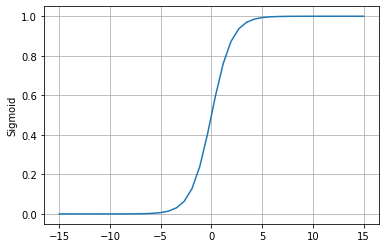

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

a = np.linspace(-15, 15, 40)
z = 1 / (1 + np.exp(-a))

plt.plot(a, z)
plt.grid()
plt.ylabel("Sigmoid")

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import random

digits = datasets.load_digits()

X = digits.data
y = digits.target


print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


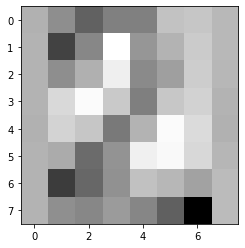

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# all parameters not specified are set to their defaults
lr = LogisticRegression()


# FIT the model
lr.fit(X_train,y_train)

sample_image = X_test[np.random.randint(0, 108)]
selected = sample_image.reshape(8,8)
plt.figure(figsize = (70,4))
plt.imshow(selected, cmap = 'binary', interpolation = None)
plt.show()

In [4]:
image = sample_image.reshape(1, -1)
image.shape

(1, 64)

In [5]:
prediction = lr.predict(image)
prediction

array([2])

In [6]:
prediction.shape

(1,)

In [7]:
#probability that the image selected is in class 0
#probability = lr.predict_proba(image)[:, 1]
probability = lr.predict_proba(image)[:, 2]
print(probability)

[0.99993046]


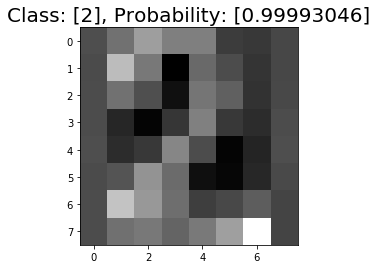

In [8]:
plt.figure(figsize=(10,4))
for value in prediction, probability:
    plt.imshow(selected, cmap=plt.cm.gray)
    plt.title('Class: {}, Probability: {}'.format(prediction, probability), fontsize = 20)

In [9]:
lr.coef_

array([[ 0.00000000e+00,  1.00887014e-02, -9.07939921e-02,
         1.20612907e-01, -2.08500770e-02, -4.10107330e-01,
        -2.76724518e-01, -2.96781035e-02, -8.82802711e-03,
        -6.40619128e-02, -1.51987782e-01,  3.37957749e-01,
         9.94241923e-02,  1.47328762e-01, -1.50671292e-01,
        -4.44581212e-02, -1.41523565e-04,  1.41291326e-01,
         1.98124921e-01, -7.46024744e-02, -6.90131424e-01,
         4.69927979e-01,  1.86259729e-01, -3.57425674e-02,
        -3.45869535e-04,  2.68154906e-01,  2.57581839e-01,
        -5.07782369e-01, -1.16975191e+00,  2.64844390e-02,
         3.78141277e-01, -2.72443815e-03,  0.00000000e+00,
         3.61330569e-01,  3.03516662e-01, -5.17822586e-01,
        -9.30523095e-01,  6.15427375e-02,  2.49409241e-01,
         0.00000000e+00, -1.84269841e-03, -4.10451317e-02,
         5.78321484e-01, -3.32161032e-01, -2.91675041e-01,
         2.07908989e-01,  1.12180013e-01, -4.48808647e-03,
        -2.89731696e-03, -1.24274130e-01,  2.83376195e-0

In [10]:
lr.coef_.shape

(10, 64)

In [11]:
def sigmoid(z):
    """
    Implement the sigmoid function

    Arguments:
    y -- a scalar (float)

    Return:
    s -- the sigmoid function evaluated on z (as in equation (1))
    """
    s = 1.0 / (1.0 + np.exp(-z))
    z = lr.coef_.T*image
    
    print (s)

In [12]:
lr.coef_.T

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00887014e-02,  4.66665966e-04,  7.50841186e-02,
         1.46650879e-01, -2.30880599e-01,  3.22688608e-01,
        -7.90632001e-02,  1.65470823e-01, -1.22329099e-01,
        -2.88176898e-01],
       [-9.07939921e-02, -9.47604889e-02,  1.49657425e-01,
        -3.85238252e-01, -3.30301945e-01,  8.83433113e-01,
        -3.42488999e-01,  1.05460650e-01,  1.90457441e-01,
        -8.54249508e-02],
       [ 1.20612907e-01,  1.22087733e-01,  1.68799200e-01,
         2.13569284e-01, -9.17531941e-01, -3.16798235e-01,
         7.93910642e-04,  1.69887220e-01, -3.52192457e-01,
         7.90772379e-01],
       [-2.08500770e-02, -1.28047189e+00,  1.60151333e-02,
         8.60293822e-01, -6.65933615e-01,  2.02956674e-01,
        -3.07463038e-01,  3.68277930e-01,  2.66435337e-01,
         5.

In [13]:
z = np.dot(lr.coef_, image.T)
s = 1.0 / (1.0 + np.exp(-z))
   
    

In [14]:
print(s)

[[2.16620858e-02]
 [1.88618489e-01]
 [9.99999745e-01]
 [9.48961211e-01]
 [6.53992065e-04]
 [8.41351772e-02]
 [4.21142229e-02]
 [9.38501162e-02]
 [9.48503295e-01]
 [3.46099766e-01]]


In [15]:
s.shape

(10, 1)